<a href="https://colab.research.google.com/github/kruthi03/wind-speed/blob/Stats%26ML/100001319_%26_100002057_Group_Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Team mates**

**1. Kruthika Panchamurthy**

**2. Poojashree Shivaraja**

**Importing libraries and loading the dataset**

In [ ]:
!pip install pandas scikit-learn tensorflow

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

data = pd.read_csv('train.csv')
data.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


**Handling missing values**

In [ ]:
# Checking for missing values
missing = data.isnull().sum()
print(missing)


Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


Using **imputation method** Postal code feature's missing datapoints are handeled.

In [ ]:
# Imputation methods
data['Postal Code'] = data['Postal Code'].fillna(data['Postal Code'].mean())
#checking missing values are handled
missing = data.isnull().sum()
print(missing)

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


**Feature Selection** using Filter (correlation)method

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

data = pd.get_dummies(data, columns=None)

corr_matrix = data.corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Feature Selection')
plt.show()

selected_features = corr_matrix['Sales'].abs().sort_values(ascending=False)
selected_features = selected_features.drop('Sales')#to drop the target variable
print("Selected Features Based on Correlation:",selected_features[selected_features > 0.5].index.tolist())

**Preparing and Splitting Data**

In [ ]:
X =data[['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']]
X = pd.get_dummies(X, columns=['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category'])#one hot encoding
data['SalesCategory'] = pd.qcut(data['Sales'], 3, labels=[0, 1, 2])
y= data['SalesCategory']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


One-hot encoding helps in handling categorical data by converting it to numerical as neural networks require numerical data as input .

**Normalizing features**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print (X_train.shape[1])


609


Normalizing data ensures all features are on the same scale helps model/algorithm to learn relationship between variables in turn improves training efficiency and increases model performance.

**1. FFNN**

In [ ]:
y_train = y_train.astype(int)
y_test = y_test.astype(int)

model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) #Adaptive Moment Estimation (adam) adjusts the weights of neurons dynamically and efficiently during training.

# loss function It measures how well the predicted probabilities from the model match the actual labels.
model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4764 - loss: 0.9986 - val_accuracy: 0.5759 - val_loss: 0.8759
Epoch 2/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5982 - loss: 0.8430 - val_accuracy: 0.5791 - val_loss: 0.8653
Epoch 3/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6087 - loss: 0.8083 - val_accuracy: 0.5791 - val_loss: 0.8665
Epoch 4/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6253 - loss: 0.7948 - val_accuracy: 0.5708 - val_loss: 0.8845
Epoch 5/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6375 - loss: 0.7799 - val_accuracy: 0.5663 - val_loss: 0.8979
Epoch 6/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6507 - loss: 0.7539 - val_accuracy: 0.5459 - val_loss: 0.9136
Epoch 7/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6560 - loss: 0.7420 - val_accuracy: 0.5574 - val_loss: 0.9207
Epoch 8/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6682 - loss: 0.7303 - val_accurac

Plotting model flow and performance

Epoch 1/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7177 - loss: 0.6133 - val_accuracy: 0.5395 - val_loss: 1.1281
Epoch 2/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7304 - loss: 0.6126 - val_accuracy: 0.5548 - val_loss: 1.1610
Epoch 3/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7137 - loss: 0.6109 - val_accuracy: 0.5274 - val_loss: 1.1569
Epoch 4/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7391 - loss: 0.5933 - val_accuracy: 0.5274 - val_loss: 1.1558
Epoch 5/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7311 - loss: 0.5998 - val_accuracy: 0.5383 - val_loss: 1.2050
Epoch 6/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7334 - loss: 0.5851 - val_accuracy: 0.5351 - val_loss: 1.1868
Epoch 7/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7460 - loss: 0.5637 - val_accuracy: 0.5274 - val_loss: 1.2133
Epoch 8/20
1568/1568 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7492 - loss: 0.5745 - 

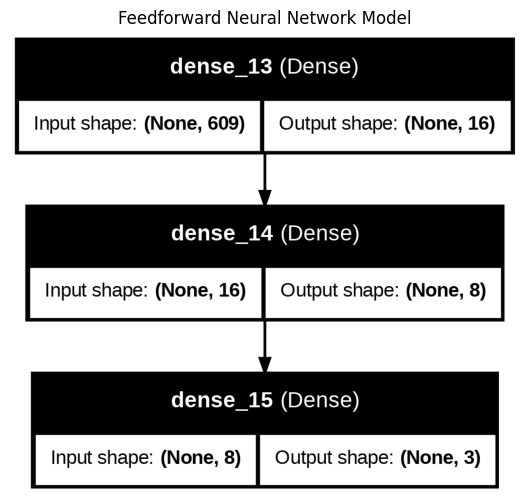

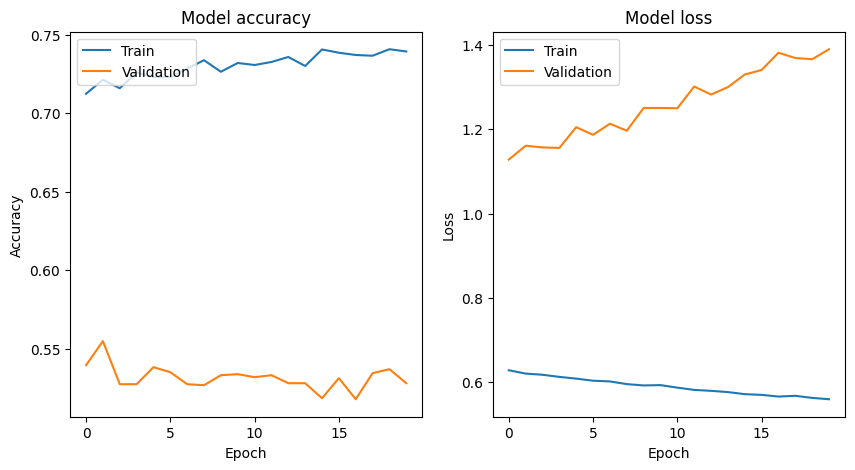

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model

history = model.fit(X_train, y_train, epochs=20, batch_size=4, validation_split=0.2)

# Save the model plot to a file
plot_model(model, to_file='ffnn_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('ffnn_model.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("Feedforward Neural Network Model")
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



From the above FFNN model's accuracy and loss plots:
*   Accuracy: Training accuracy is high, but there's a noticeable gap between training and validation accuracy, suggesting potential overfitting.The accuracy on the validation set stops improving after a certain number of training epochs .
*   Loss: Training loss decreases nicely, but validation loss starts to increase after a few epochs or fluctuating validation loss, again pointing to overfitting.



**2. CNN**

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten , Reshape , Input


input_shape = X_train.shape[1]

# Build CNN model
cnn_model = Sequential([
    Input(shape=(input_shape,)),
    Dense(128, activation='relu'),
    Reshape((16, 8, 1)),  # Reshape to a compatible size
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile and train the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.2f}")


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4584 - loss: 1.0272 - val_accuracy: 0.5842 - val_loss: 0.8710
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6041 - loss: 0.8262 - val_accuracy: 0.5816 - val_loss: 0.8684
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6333 - loss: 0.8032 - val_accuracy: 0.5740 - val_loss: 0.8786
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6409 - loss: 0.7947 - val_accuracy: 0.5587 - val_loss: 0.8965
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6768 - loss: 0.7346 - val_accuracy: 0.5561 - val_loss: 0.9010
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6811 - loss: 0.7176 - val_accuracy: 0.5459 - val_loss: 0.9550
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7069 - loss: 0.6670 - val_accuracy: 0.5485 - val_loss: 0.9845
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7296 - loss: 0.6238 - val_accuracy:

Plotting model flow and performance

Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8093 - loss: 0.4024 - val_accuracy: 0.5077 - val_loss: 1.4139
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8083 - loss: 0.4018 - val_accuracy: 0.5179 - val_loss: 1.4468
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8113 - loss: 0.3904 - val_accuracy: 0.5064 - val_loss: 1.4138
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8171 - loss: 0.3897 - val_accuracy: 0.5064 - val_loss: 1.4230
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8043 - loss: 0.4013 - val_accuracy: 0.5204 - val_loss: 1.4365
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8120 - loss: 0.3882 - val_accuracy: 0.5013 - val_loss: 1.4639
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8244 - loss: 0.3690 - val_accuracy: 0.4987 - val_loss: 1.4804
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8007 - loss: 0.3904 - val_accuracy: 

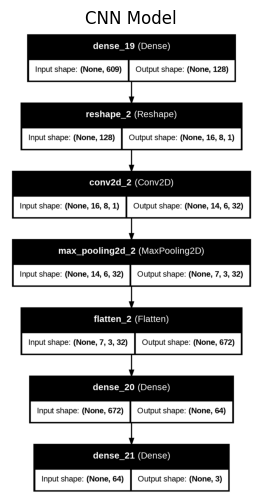

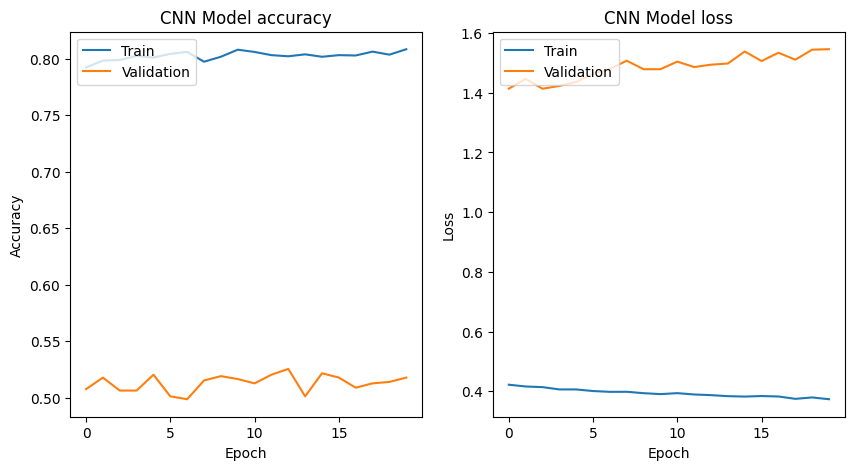

In [ ]:
history = cnn_model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.1)
# Save the model plot to a file
plot_model(cnn_model, to_file='cnn_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('cnn_model.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("CNN Model")
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('CNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('CNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


From the above CNN model's accuracy and loss plots:

*   Accuracy: Both training and validation accuracy increase,Validation accuracy continues to improve throughout the epochs
*   Loss: Training and validation losses both decrease steadily,with a relatively small gap between them.



**3. RNN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.preprocessing import LabelEncoder
import numpy as np


# Instead of converting X and y to numpy arrays again,
# use the original dataframe 'data' to get the correct X and y
X = data[['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category']]
X = pd.get_dummies(X, columns=['Ship Mode', 'Segment', 'City', 'State', 'Region', 'Category', 'Sub-Category'])
data['SalesCategory'] = pd.qcut(data['Sales'], 3, labels=[0, 1, 2])
y = data['SalesCategory']

# Encoding y from categoric to numeric
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X = X.values  # Convert to numpy array

# Reshape X for RNN input: (samples, time_steps=1, features)
X_rnn = X.reshape(X.shape[0], 1, X.shape[1])


# Build the RNN model
rnn_model = Sequential([
    SimpleRNN(16, activation='relu', input_shape=(X_rnn.shape[1], X_rnn.shape[2])),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 output categories for SalesCategory
])

# Compile the model
rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
rnn_model.fit(X_rnn, y, epochs=20, batch_size=32)

loss, accuracy = rnn_model.evaluate(X_rnn, y, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.4736 - loss: 1.0354
Epoch 2/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5934 - loss: 0.8515
Epoch 3/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6035 - loss: 0.8249
Epoch 4/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6141 - loss: 0.8178
Epoch 5/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6236 - loss: 0.8042
Epoch 6/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6218 - loss: 0.7981
Epoch 7/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6212 - loss: 0.7877
Epoch 8/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6368 - loss: 0.7846
Epoch 9/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6418 - loss: 0.7696
Epoch 10/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6471 - loss: 0.7645
Epoch 11/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6443 - loss: 0.7619
Epoch 12/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

Plotting model flow and performance

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6781 - loss: 0.7149 - val_accuracy: 0.6388 - val_loss: 0.7429
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6813 - loss: 0.7041 - val_accuracy: 0.6270 - val_loss: 0.7582
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6911 - loss: 0.6968 - val_accuracy: 0.6240 - val_loss: 0.7647
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6821 - loss: 0.6917 - val_accuracy: 0.6219 - val_loss: 0.7733
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6893 - loss: 0.6823 - val_accuracy: 0.6173 - val_loss: 0.7838
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6907 - loss: 0.6810 - val_accuracy: 0.6087 - val_loss: 0.7893
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6978 - loss: 0.6625 - val_accuracy: 0.6082 - val_loss: 0.7973
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6998 - loss: 0.6771 - val_accuracy: 0.

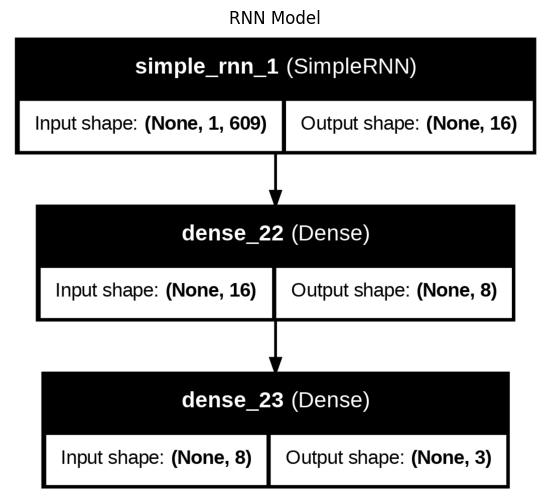

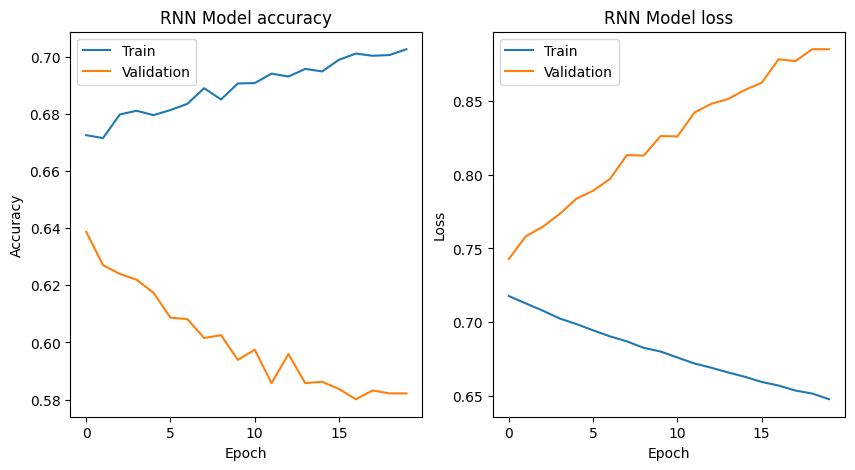

In [ ]:
history = rnn_model.fit(X_rnn, y, epochs=20, batch_size=32,validation_split=0.2)

# Save the model plot to a file
plot_model(rnn_model, to_file='rnn_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('rnn_model.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("RNN Model")
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('RNN Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('RNN Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

From the above RNN model's accuracy and loss plots:

*  Accuracy: Training and validation accuracy increase, but validation accuracy seems to fluctuate
*  Loss: Training and validation losses decrease, but validation loss might stop after certain epochs and shows some fluctuations, indicating some instability



**4. LSTM**

In [ ]:
from tensorflow.keras.layers import LSTM, Dense

# Reshape X for RNN input: (samples, time_steps=1, features)
X_lstm = X.reshape(X.shape[0], 1, X.shape[1])

# Build the LSTM model
lstm_model = Sequential([
    LSTM(16, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])),
    Dense(8, activation='relu'),
    Dense(3, activation='softmax')  # 3 output categories for SalesCategory
])

# Compile the model
lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_lstm, y, epochs=20, batch_size=32)

# Evaluate the LSTM model
loss, accuracy = lstm_model.evaluate(X_lstm, y, verbose=0)
print(f"LSTM Loss: {loss:.4f}")
print(f"LSTM Accuracy: {accuracy:.4f}")

Epoch 1/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.4204 - loss: 1.0566
Epoch 2/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5933 - loss: 0.8456
Epoch 3/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6132 - loss: 0.8239
Epoch 4/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6083 - loss: 0.8167
Epoch 5/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6102 - loss: 0.8168
Epoch 6/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6224 - loss: 0.8010
Epoch 7/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6254 - loss: 0.7960
Epoch 8/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6309 - loss: 0.7937
Epoch 9/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6272 - loss: 0.7806
Epoch 10/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6381 - loss: 0.7755
Epoch 11/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6345 - loss: 0.7727
Epoch 12/20
307/307 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Plotting model flow and performance

Epoch 1/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6647 - loss: 0.7164 - val_accuracy: 0.6480 - val_loss: 0.7366
Epoch 2/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6642 - loss: 0.7146 - val_accuracy: 0.6383 - val_loss: 0.7494
Epoch 3/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6679 - loss: 0.7036 - val_accuracy: 0.6362 - val_loss: 0.7585
Epoch 4/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6723 - loss: 0.6956 - val_accuracy: 0.6179 - val_loss: 0.7691
Epoch 5/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6689 - loss: 0.7025 - val_accuracy: 0.6270 - val_loss: 0.7723
Epoch 6/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6752 - loss: 0.7034 - val_accuracy: 0.6230 - val_loss: 0.7857
Epoch 7/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6771 - loss: 0.6860 - val_accuracy: 0.6245 - val_loss: 0.7892
Epoch 8/20
245/245 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6933 - loss: 0.6782 - val_accuracy: 0.

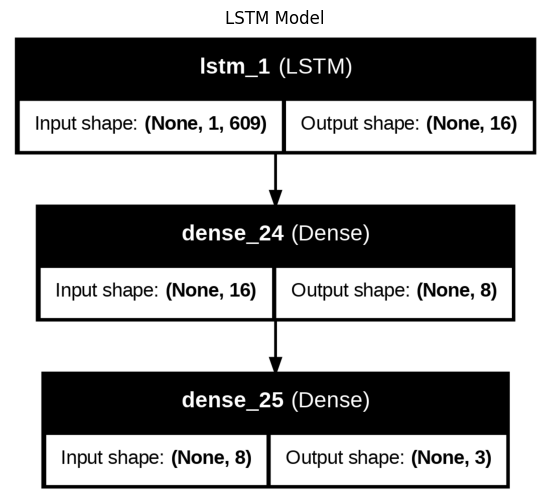

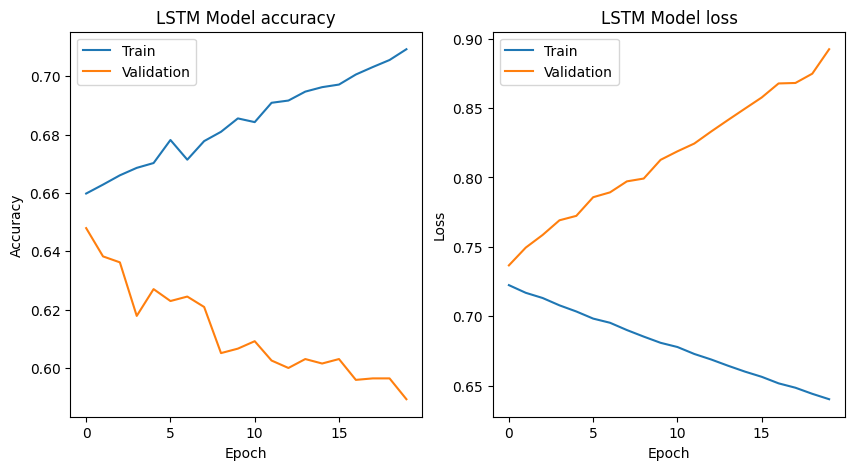

In [ ]:
history = lstm_model.fit(X_lstm, y, epochs=20, batch_size=32, validation_split=0.2)

# Save the model plot to a file
plot_model(lstm_model, to_file='lstm_model.png', show_shapes=True, show_layer_names=True)

# Display the plot
img = plt.imread('lstm_model.png')
plt.figure(figsize=(10, 6))
plt.imshow(img)
plt.axis('off')
plt.title("LSTM Model")
plt.show()

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('LSTM Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('LSTM Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

From the above LSTM model's accuracy and loss plots:

*   Accuracy: Training and validation accuracy increase, with a smaller gap.Validation accuracy continues to improve
*  Loss: Training and validation losses decrease, but validation might stop after a certain number of training epochs .



**Best-performing architecture**

 Considering perfomance(accuracy,loss) of all 4 models CNN model has better performance.

*   Strengths:  

  *   The CNN exhibits stable and consistent learning, with smooth accuracy and loss curves and continuous improvement in validation performance. This suggests reliable and predictable behavior, making it a more robust choice.
  *   The CNN demonstrates the best generalization ability among the compared models, evidenced by the smallest gap between training and validation performance.
  *   The CNN effectively reduces both training and validation losses, suggesting its ability to capture relevant patterns and minimize prediction errors.


*   Limitations:
  *    CNN performance can be sensitive to the choice of architecture (number of layers, filter sizes, etc.) and hyperparameters (learning rate, batch size, etc.)
  *    For certain types of data or prediction tasks, other models (like RNNs for sequential data) might be more suitable

